## Setting up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Reading in Data

In [2]:
data = pd.read_excel(r'data/SimData_Transplant_Ver2.0.xls')
#data = data.loc[(data['Bloodtype'] == data['Donor_Bloodtype'])]

In [3]:
data.head() #Whereblood type matches

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,O,inpt,Male,B,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962,0
1,Male,A,home,Male,O,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065,1
2,Female,A,home,Male,A,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200,0
3,Male,O,inpt,Female,B,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556,0
4,Male,O,home,Female,O,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515,0


In [4]:
data.drop(columns=['Gender','Donor_Bloodtype','Donor_Sex','Cens'], inplace=True)

In [5]:
data.head() #Whereblood type matches

,Bloodtype,Inpt_attx,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time
0,O,inpt,No,1,54.291739,45.379636,24.712049,21.369229,22.939930,22.931727,2019.866962
1,A,home,No,157,59.817111,60.516200,28.887631,25.408853,18.985337,21.381548,1815.128065
2,A,home,No,49,63.198440,30.989861,26.869533,24.902931,23.694392,26.243047,396.556200
3,O,inpt,No,81,28.845900,41.142174,27.411596,35.396950,11.375444,8.545730,1326.259556
4,O,home,No,620,55.523918,49.138937,24.530967,29.372668,26.835544,29.211865,605.043515


In [ ]:
data.describe()

## Data cleaning

In [6]:
#Removing negative age & keeping only adult data by filtering out age

data = data.loc[(data['Age_Tx'] > 18)]
data = data.loc[(data['Donor_Age'] > 18)]

In [ ]:
data.describe()

In [ ]:
sns.displot(x=data.MELD, data = data)

In [ ]:
sns.displot(x=data.Waittime, data = data)

In [ ]:
sns.displot(x=data.Time, data = data)

### New Variable - MedicalSuccess
- should a patient have a survival time of greater than 1825 data (5 years), we consider this a success
- might come back to 1 year
- alternatively no
- effectively replacing Cens column to understand transplant


-- note
- remove meldna

In [7]:
data.loc[(data['Time'] >= 1825) , 'MedicalSuccess'] = 1
data.loc[(data['Time'] < 1825) , 'MedicalSuccess'] = 0

In [8]:
data.MedicalSuccess.isna().sum()

0

In [9]:
#Gives a more even binning interms of success or failure
data.MedicalSuccess.value_counts()

0.0    2071
1.0    1688
Name: MedicalSuccess, dtype: int64

In [ ]:
data.head()

In [ ]:
data.shape

In [10]:
MS = data.MedicalSuccess.copy()

In [11]:
pca_data = data.drop(columns=['Bloodtype','Inpt_attx','Donor_DCD','MedicalSuccess','Time'])

## PCA

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
pca_rescaledD = pca_data.copy()

In [14]:
pca_x = pca_rescaledD.values

In [15]:
pca_x = StandardScaler().fit_transform(pca_x)

In [16]:
pca_x

array([[-0.77268309,  0.20316945, -0.09217617, ..., -1.03388748,
         0.44254091,  0.32038105],
       [-0.00596867,  0.73415301,  0.90288377, ..., -0.19243619,
        -0.03015564,  0.14280561],
       [-0.53677096,  1.05909589, -1.03814303, ..., -0.29781948,
         0.53272251,  0.69969797],
       ...,
       [-0.48270777, -0.99549371, -0.48508976, ..., -0.33584546,
        -0.01683418,  0.21727518],
       [-0.03054285, -1.48422185, -1.8643163 , ..., -0.75621904,
        -0.27860101, -0.63164357],
       [-0.09935055, -2.53584501, -0.46345552, ..., -1.60248998,
        -0.50799249, -0.87393791]])

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(pca_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [18]:
principalComponents

array([[ 0.64357979, -1.10048598,  0.22255823],
       [-0.02985756, -0.18727756, -1.11655898],
       [ 0.78082281, -0.36302808,  0.09361573],
       ...,
       [ 0.40349218,  0.44066599,  1.02407179],
       [-0.37741026,  1.05488928,  2.31762851],
       [-0.54833774, -1.16715946,  2.46059162]])

In [19]:
finalDf = pd.concat([principalDf, data[['MedicalSuccess']]], axis = 1)

In [20]:
pca.explained_variance_

array([2.03862092, 1.18224526, 1.09621822])

In [21]:
pca.components_

array([[-0.22587099, -0.1569294 ,  0.00687313,  0.01355278,  0.00979688,
         0.68077947,  0.67865151],
       [-0.02284604, -0.155851  , -0.11748468,  0.69587537,  0.68916775,
        -0.03355912, -0.03263346],
       [-0.16632012, -0.63985557, -0.70995893, -0.11199942, -0.16732651,
        -0.09002032, -0.10116861]])

In [ ]:
principalDf.shape

In [22]:
d1 = data.copy()

In [23]:
d1['pc1'] = principalDf['principal component 1']
d1['pc2'] = principalDf['principal component 2']
d1['pc3'] = principalDf['principal component 3']

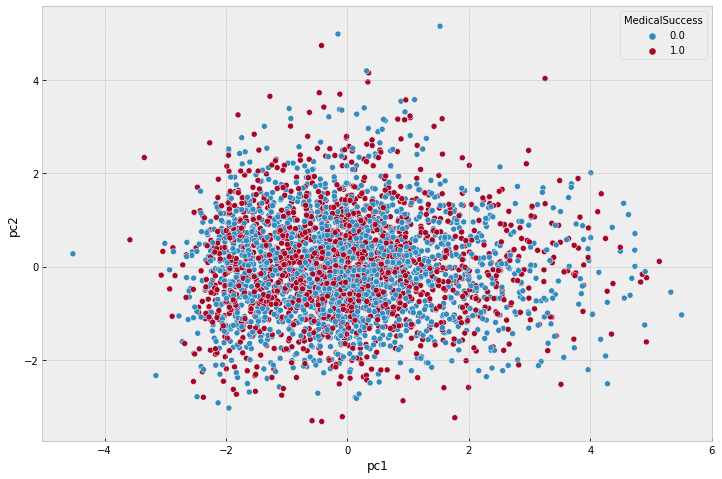

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="pc1", y="pc2", hue = 'MedicalSuccess',data=d1)
plt.show()

In [ ]:
d1.columns

In [ ]:
fig, axs = plt.subplots(figsize=(18, 8),ncols=3)
sns.scatterplot(x="pc1", y="pc2", hue = 'Inpt_attx', data=d1, ax=axs[0])
sns.scatterplot(x="pc1", y="pc2", hue = 'Bloodtype',data=d1, ax=axs[1])
sns.scatterplot(x="pc1", y="pc2", hue = 'MedicalSuccess',data=d1, palette = "rocket", ax=axs[2])

In [25]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [26]:
for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

Explained variation per principal component: 29.12%
Explained variation per principal component: 16.88%
Explained variation per principal component: 15.66%


In [27]:
d1['MedicalSuccess']=pd.Categorical(d1['MedicalSuccess'])
my_color=d1['MedicalSuccess'].cat.codes

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d1['pc1'], d1['pc2'], d1['pc3'], c=my_color, cmap="Set2_r", s=60)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA ")
plt.show()

In [28]:
import plotly.express as px
from sklearn.datasets import load_iris

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline



In [29]:
X = pca_data.copy()
y=data[['MedicalSuccess']].copy()


In [30]:
pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["first_comp", "second_comp", "third_comp"])))]).fit(X)


In [ ]:
data.shape

In [ ]:
pca_data.shape

In [ ]:
X3D.shape

In [31]:
X3D = pca.transform(X)


In [ ]:
X3D.shape

In [ ]:
data.MedicalSuccess.count()

In [ ]:
pca_data

In [ ]:
data[['MedicalSuccess']]

In [ ]:
X3D_1.shape

In [ ]:
X3D

In [32]:
fig = px.scatter_3d(X3D,x = "first_comp", y = "second_comp",z = "third_comp")

In [33]:
fig.show()

/home/kprasath/anaconda3/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Iris samples filtered by petal width'),
    dcc.Graph(id="graph"),
    html.P("Petal Width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 2.5: '2.5'},
        value=[0.5, 2]
    ),
])

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = px.X3D # replace with your own data source
    low, high = slider_range
    mask = (df.first_comp > low) & (df.first_comp < high)

    fig = px.scatter_3d(X3D[mask], 
        x='first_comp', y='second_comp', z='third_comp',
        color=MS, hover_data=['first_comp'])
    return fig

app.run_server(debug=True)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter3d(X3D,x = "first_comp", y = "second_comp",z = "third_comp"
                                  )])
fig.show()

In [34]:
pca = PCA(n_components=3)
components = pca.fit_transform(pca_x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=MS,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [35]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.show()

In [ ]:
pip install plotly==5.10.0

In [ ]:
pip install dash
